# Exploratory Data Analysis - Terrorism

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
terror_df = pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv', encoding='latin1')

In [3]:
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terror_df.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [5]:
terror_df.rename(columns={'iyear':'year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'killeed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
terror_df.columns

Index(['eventid', 'year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
terror_df.shape

(181691, 135)

In [8]:
terror_df.isna().sum()

eventid            0
year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
terror_df.describe(include='all')

,eventid,year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


## ***`***Exploratory Data Analysis***`***

In [11]:
print('Country with most attacks: ',terror_df['country'].value_counts().idxmax())
print('City with most attacks: ',terror_df['city'].value_counts().index[1])
print("Region with the most attacks: ",terror_df['Region'].value_counts().idxmax())
print("Year with the most attacks: ",terror_df['year'].value_counts().idxmax())
print("Month with the most attacks: ",terror_df['Month'].value_counts().idxmax())
print("Group with the most attacks: ",terror_df['Group'].value_counts().idxmax())
print("Most Attack Types: ",terror_df['AttackType'].value_counts().idxmax())


Country with most attacks:  95
City with most attacks:  Baghdad
Region with the most attacks:  Middle East & North Africa
Year with the most attacks:  2014
Month with the most attacks:  5
Group with the most attacks:  Unknown
Most Attack Types:  Bombing/Explosion


In [12]:
terror_df['year'].value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: year, dtype: int64

**Visualization**

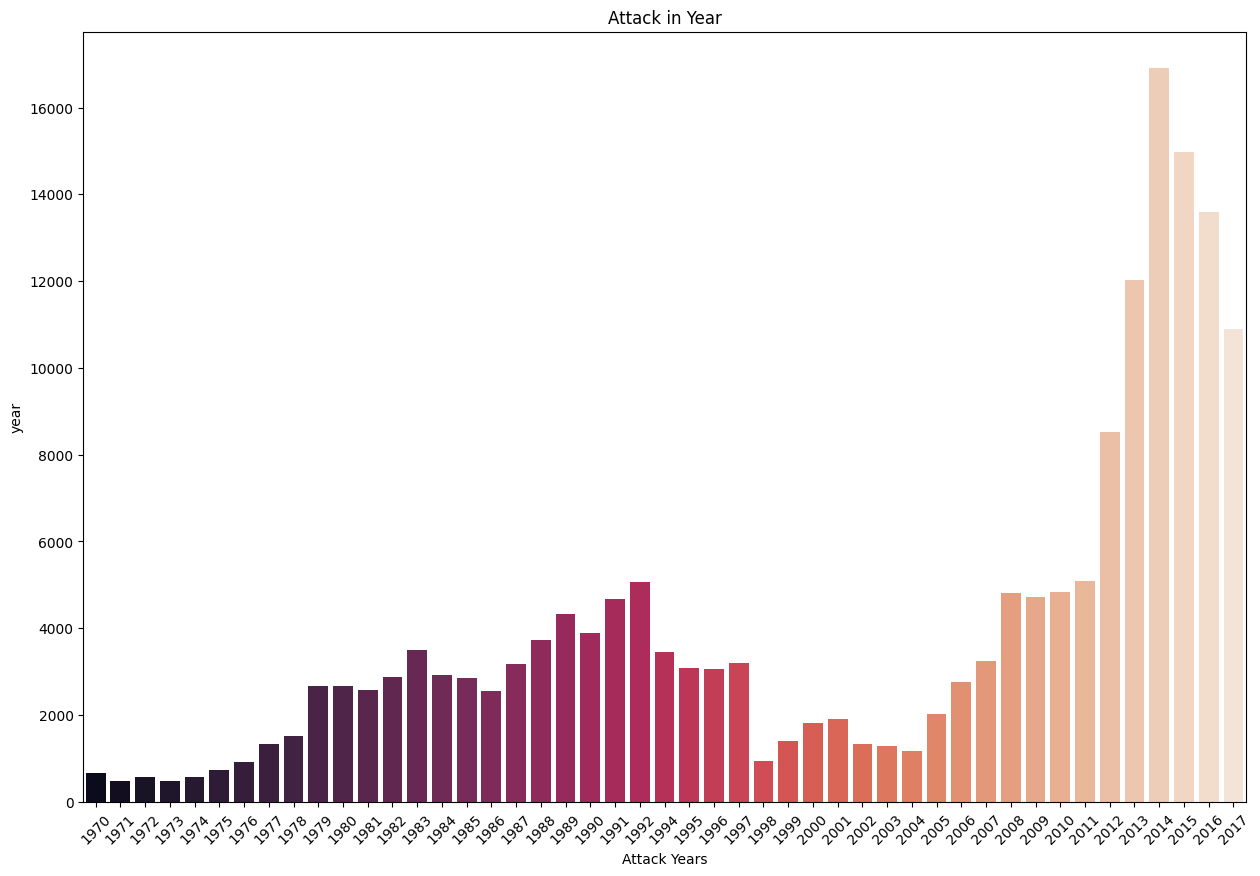

In [13]:
#Barplot
import seaborn as sns
x_year=terror_df['year'].unique()
y_year=terror_df['year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15,10))
plt.title("Attack in Year")
plt.xlabel("Attack Years")
plt.ylabel("Number of attacks in each year")
plt.xticks(rotation=45)
sns.barplot(x=x_year,y=y_year,palette='rocket')
plt.show()

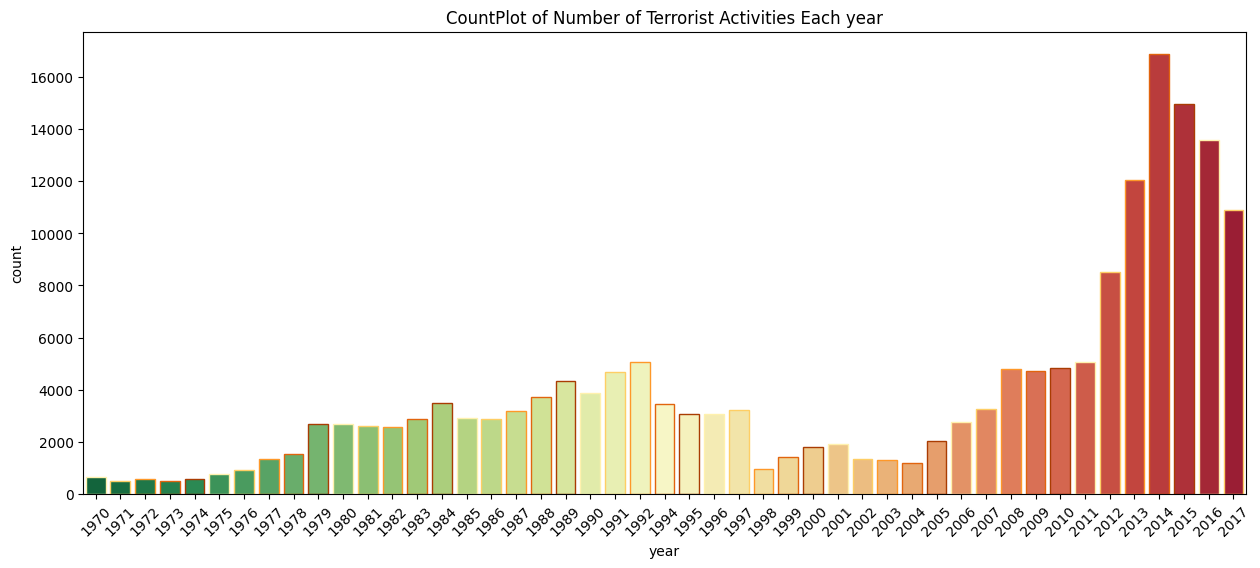

In [14]:
#Contplot
plt.subplots(figsize=(15,6))
sns.countplot(x='year', data=terror_df, palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=45)
plt.title('CountPlot of Number of Terrorist Activities Each year')
plt.show()

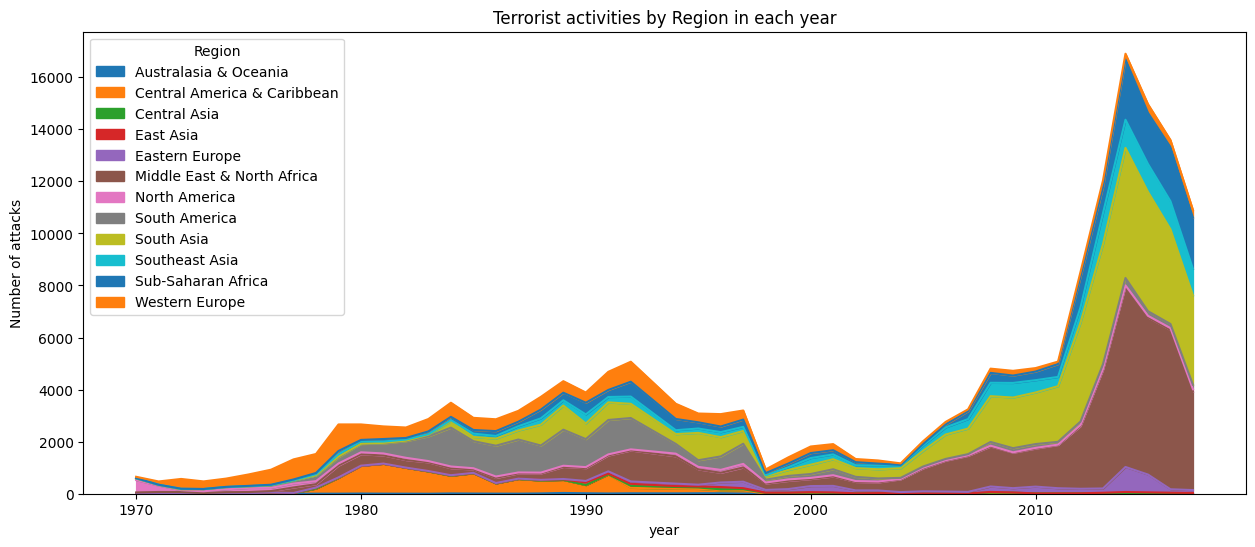

In [15]:
#Areaplot
pd.crosstab(terror_df.year,terror_df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activities by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

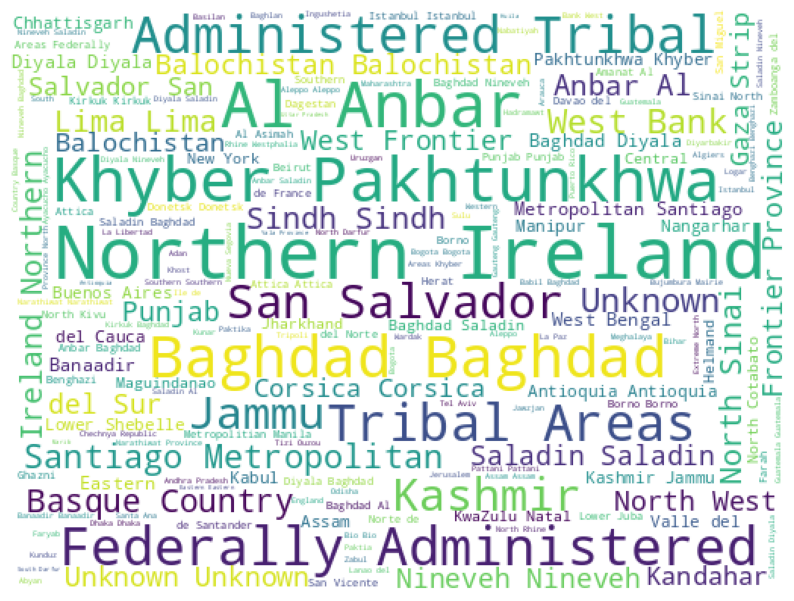

In [16]:
from wordcloud import WordCloud
from scipy import signal
cities=terror_df.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color='white',width=512,height=384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [17]:
terror_df['Wounded'] = terror_df['Wounded'].fillna(0).astype(int)


In [18]:
terror_df['killeed'] = terror_df['killeed'].fillna(0).astype(int)
terror_df['casualities']=terror_df['killeed']+terror_df['Wounded']


In [19]:
terror1=terror_df.sort_values(by='casualities',ascending=False)[:40]

In [20]:
terror1.corr()

,eventid,year,Month,Day,extended,country,region,latitude,longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
eventid,1.000000,0.999996,-0.004240,-0.109776,0.363531,0.020154,0.295218,0.125265,0.064601,-0.043435,...,NaN,NaN,NaN,0.828560,0.218838,0.171614,0.185709,0.258289,0.276448,-0.161640
year,0.999996,1.000000,-0.007232,-0.109231,0.363265,0.020366,0.295366,0.125148,0.065363,-0.043923,...,NaN,NaN,NaN,0.828417,0.217861,0.171642,0.185734,0.257848,0.276422,-0.162074
Month,-0.004240,-0.007232,1.000000,-0.209591,0.090666,-0.070332,-0.043232,0.035762,-0.261918,0.155851,...,NaN,NaN,NaN,-0.543083,0.202132,-0.011482,-0.010032,0.141333,0.006228,0.148148
Day,-0.109776,-0.109231,-0.209591,1.000000,-0.229216,-0.000228,-0.315652,0.048502,0.265903,0.228815,...,NaN,NaN,NaN,-0.172005,-0.656073,0.029631,0.008075,0.120479,0.012396,-0.071522
extended,0.363531,0.363265,0.090666,-0.229216,1.000000,-0.160982,0.236480,0.114215,0.110772,0.147411,...,NaN,NaN,NaN,0.745356,0.452502,0.062322,0.052646,-0.153522,0.024088,-0.111354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INT_LOG,0.171614,0.171642,-0.011482,0.029631,0.062322,0.070966,0.186641,-0.118406,0.215774,-0.123924,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.993483,-0.043789,0.908341,0.155813
INT_IDEO,0.185709,0.185734,-0.010032,0.008075,0.052646,0.101649,0.191462,-0.122033,0.165993,-0.122886,...,NaN,NaN,NaN,-0.333333,-0.141022,0.993483,1.000000,-0.017208,0.915912,0.172009
INT_MISC,0.258289,0.257848,0.141333,0.120479,-0.153522,-0.138874,0.127453,-0.245270,0.064631,-0.093352,...,NaN,NaN,NaN,NaN,NaN,-0.043789,-0.017208,1.000000,0.185312,0.020643
INT_ANY,0.276448,0.276422,0.006228,0.012396,0.024088,0.069080,0.206346,-0.059280,0.150270,-0.148098,...,NaN,NaN,NaN,-0.333333,-0.141022,0.908341,0.915912,0.185312,1.000000,0.151294


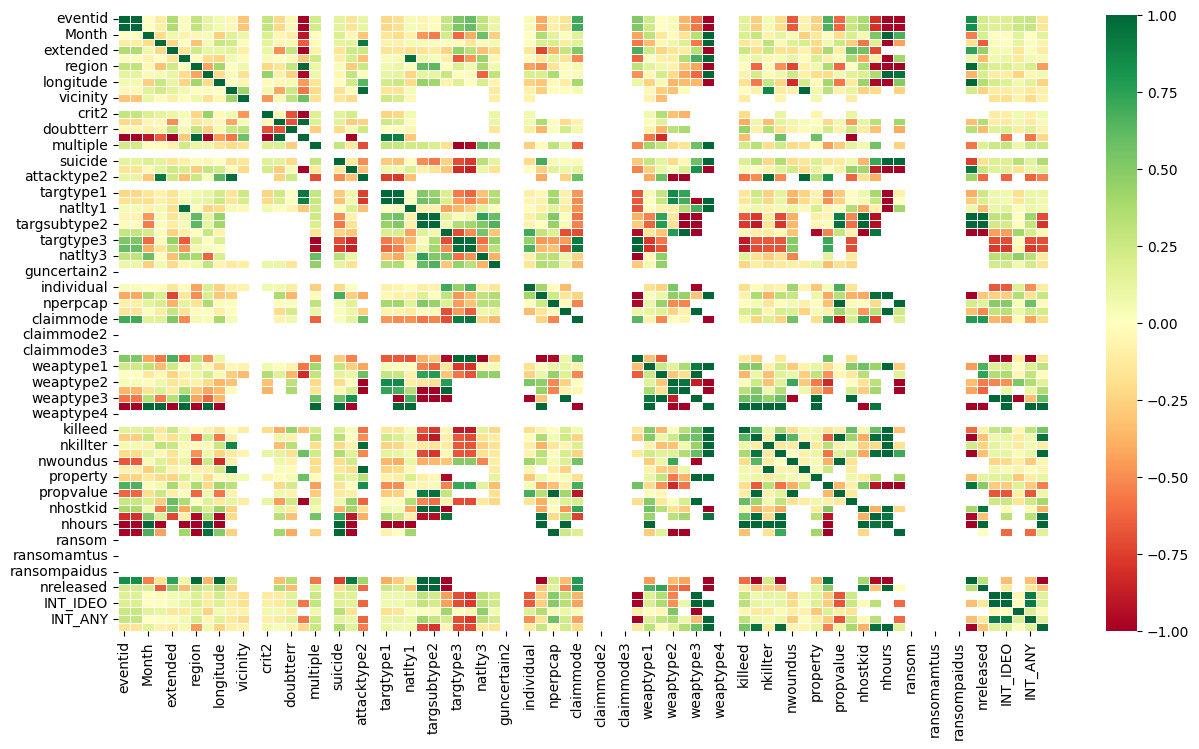

In [21]:
#generating heatmap for correlation poly
plt.figure(figsize=[15,8])
sns.heatmap(terror1.corr(),cmap='RdYlGn',linewidths=0.4)
plt.show()

In [22]:
attack_country=terror_df.Country.value_counts()[:20]
attack_country


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

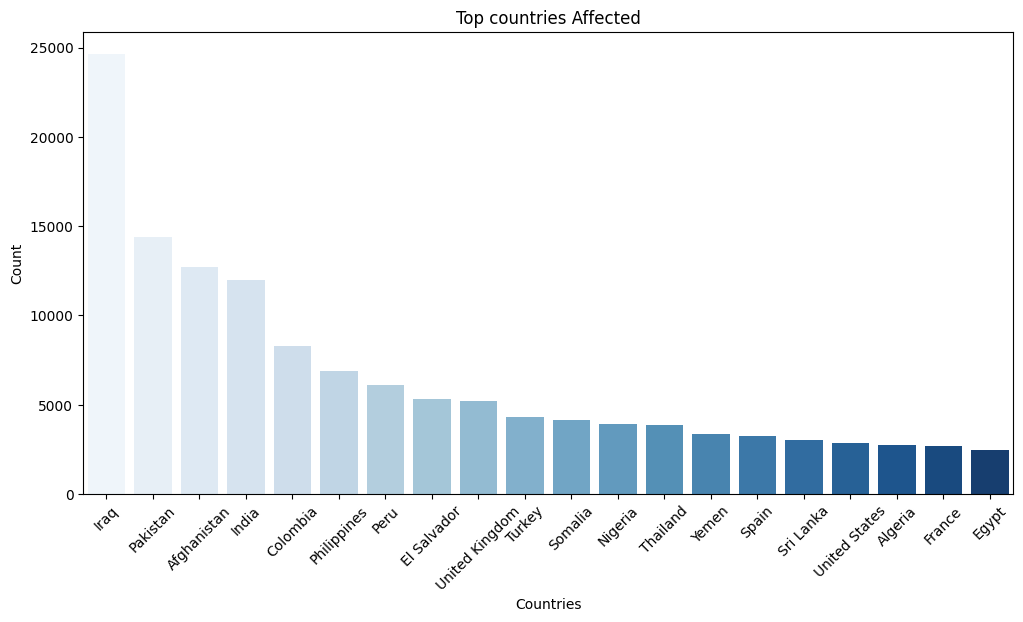

In [23]:
#Countries affected by terrorism
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_country.index,y=attack_country.values,palette='Blues')
plt.title('Top countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [24]:
attack_groups=terror_df.Group.value_counts()[1:20]
attack_groups

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

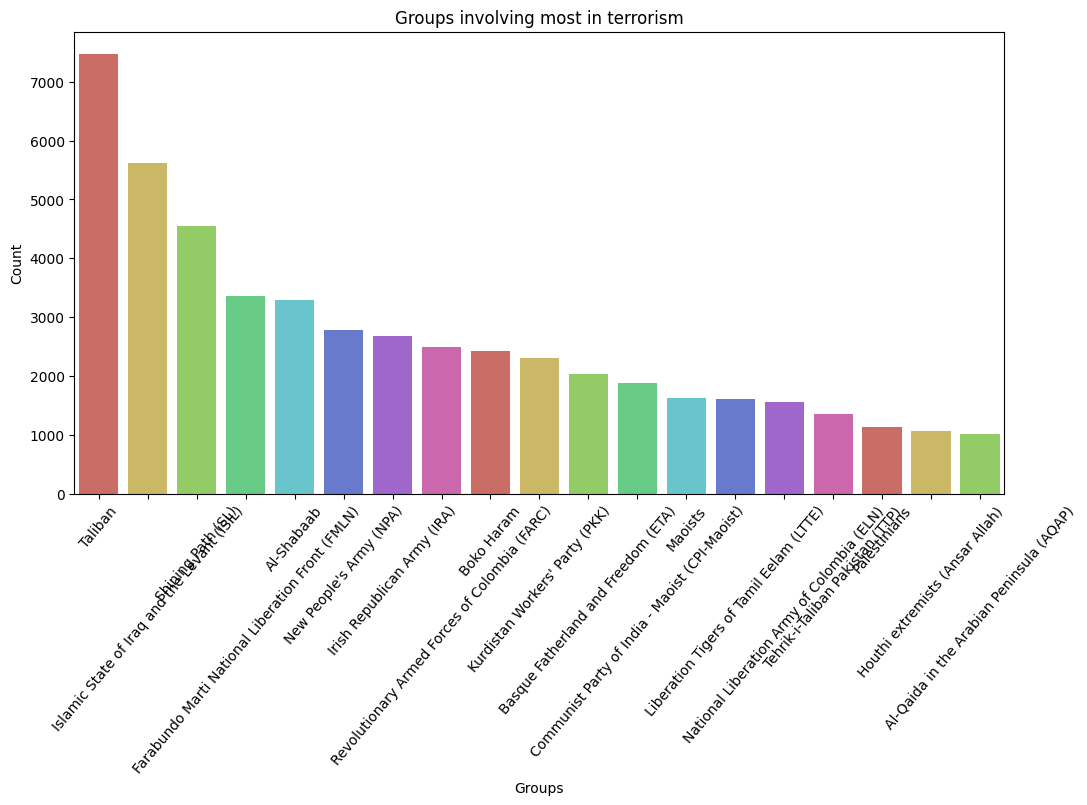

In [25]:
#Groups involving most in terrirism
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_groups.index,y=attack_groups.values,palette=sns.color_palette("hls",8))
plt.title('Groups involving most in terrorism')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

In [26]:
#Terrorist group names and killed each year
group_killed=terror_df[['Group','killeed']].groupby(['Group'],axis=0).sum().sort_values('killeed',ascending=False).head(20)
group_killed

,killeed
Group,
Unknown,112367
Islamic State of Iraq and the Levant (ISIL),38923
Taliban,29410
Boko Haram,20328
Shining Path (SL),11601
Liberation Tigers of Tamil Eelam (LTTE),10989
Al-Shabaab,9330
Farabundo Marti National Liberation Front (FMLN),8065
Nicaraguan Democratic Force (FDN),6662


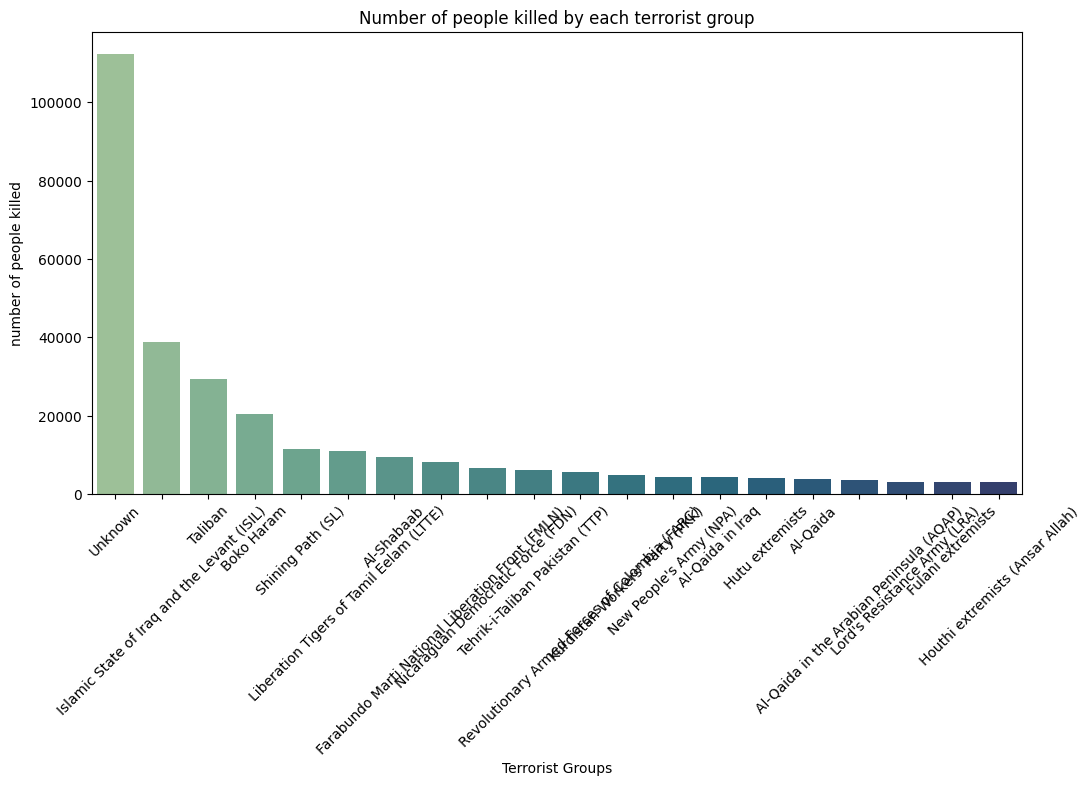

In [27]:
#people killed by eeach group in terrorist activity
plt.subplots(figsize=(12,6))
sns.barplot(x=group_killed.index,y=group_killed.killeed.values,palette="crest")
plt.title('Number of people killed by each terrorist group')
plt.xlabel('Terrorist Groups')
plt.ylabel('number of people killed')
plt.xticks(rotation=45)
plt.show()

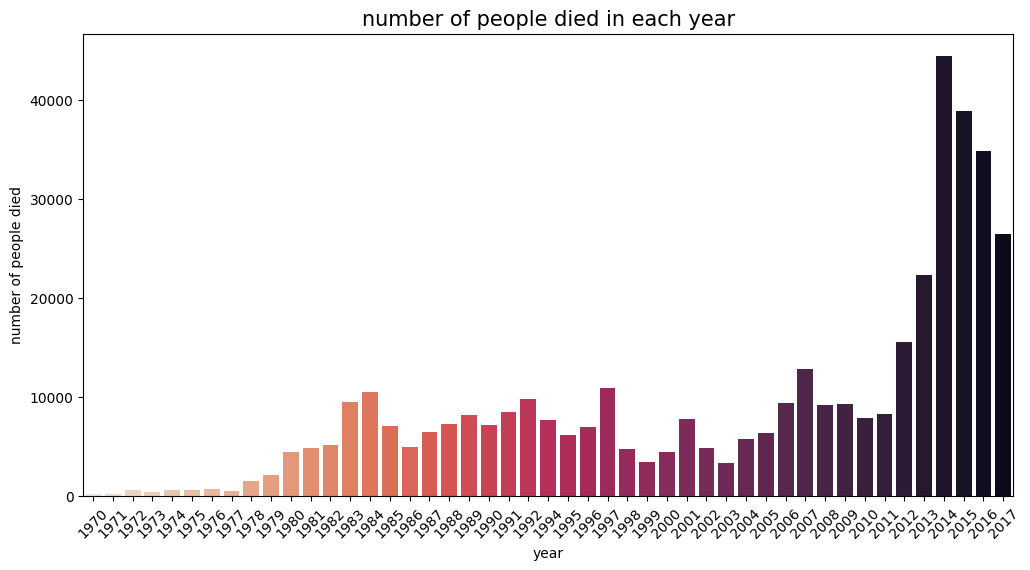

In [28]:
#number of people die in each other
died_people=terror_df[['year','killeed']].groupby(['year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(x=died_people.index,y=died_people.killeed.values,palette="rocket_r")
plt.title("number of people died in each year",fontsize=15)
plt.ylabel("number of people died")
plt.xlabel('year')
plt.xticks(rotation=45)
plt.show()

In [29]:
attack_cities=terror_df.city.value_counts()[:20]
attack_cities

Unknown           9775
Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Name: city, dtype: int64

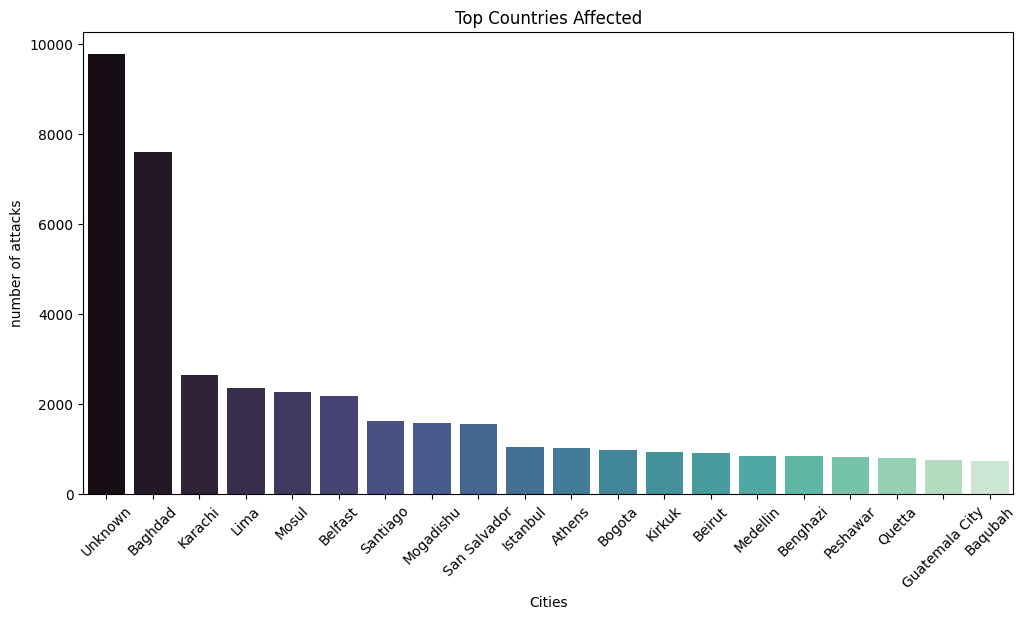

In [30]:
#top countries effected
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_cities.index,y=attack_cities.values,palette="mako")
plt.title('Top Countries Affected')
plt.xlabel('Cities')
plt.ylabel('number of attacks')
plt.xticks(rotation=45)
plt.show()

In [31]:
attack_type=terror_df.AttackType.value_counts()[:20]
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

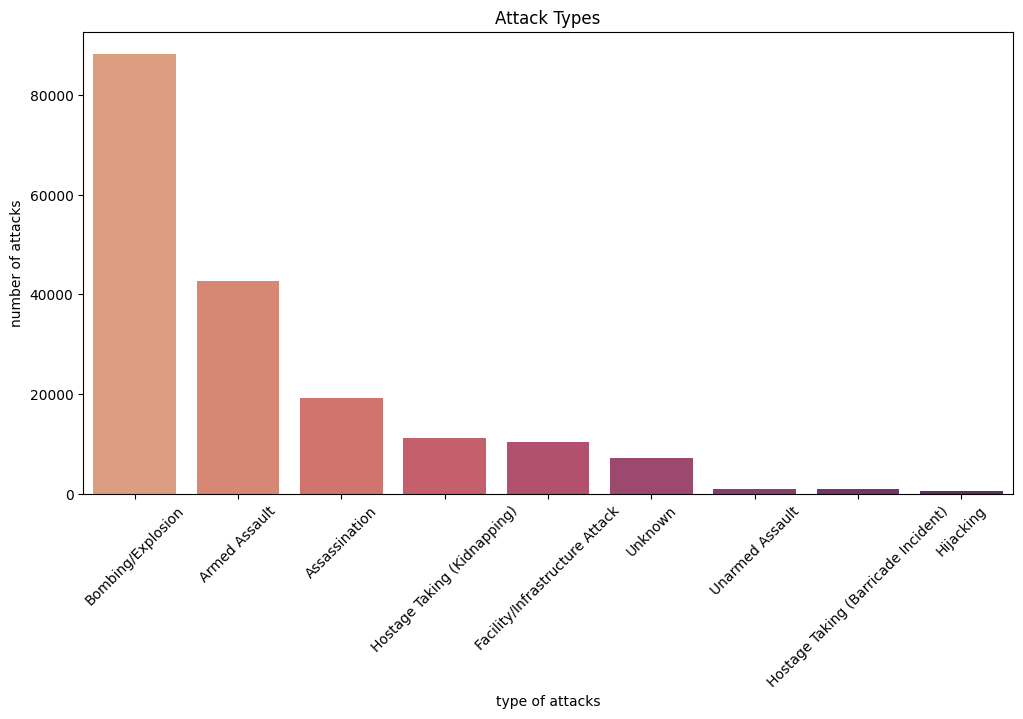

In [32]:
#Attack types
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_type.index,y=attack_type.values,palette="flare")
plt.title('Attack Types')
plt.xlabel('type of attacks')
plt.ylabel('number of attacks')
plt.xticks(rotation=45)
plt.show()

In [33]:
attack_killed=terror_df[['AttackType','killeed']].groupby(["AttackType"],axis=0).sum()
attack_killed

,killeed
AttackType,
Armed Assault,160297
Assassination,24920
Bombing/Explosion,157321
Facility/Infrastructure Attack,3642
Hijacking,3718
Hostage Taking (Barricade Incident),4478
Hostage Taking (Kidnapping),24231
Unarmed Assault,880
Unknown,32381


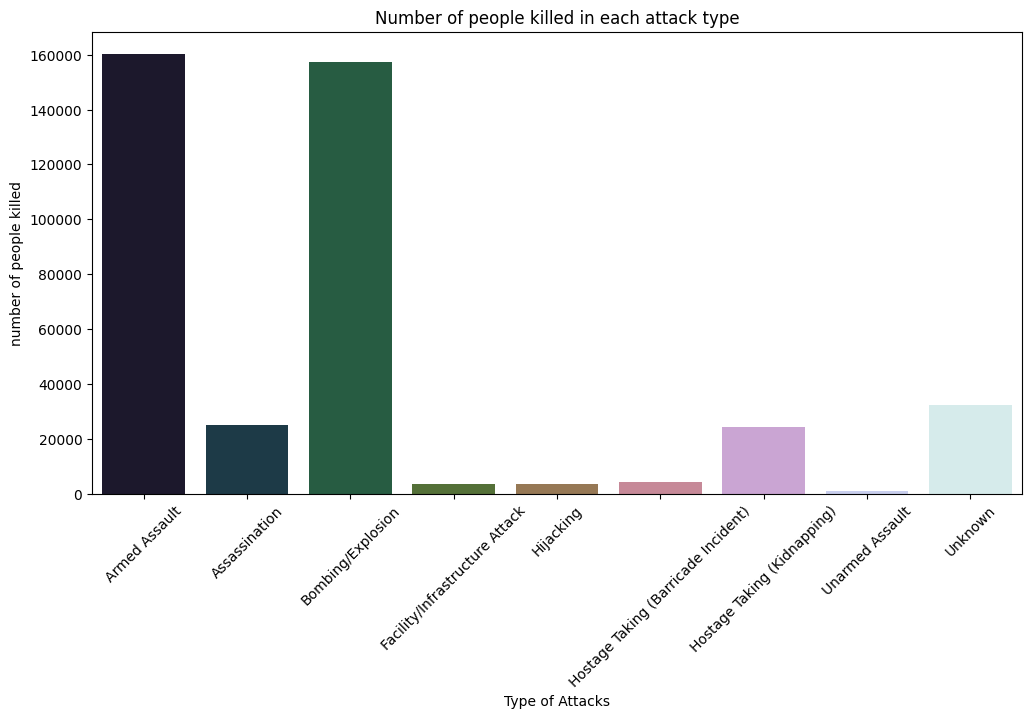

In [34]:
#people killed in each attack type
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_killed.index,y=attack_killed.killeed.values,palette="cubehelix")
plt.title('Number of people killed in each attack type')
plt.xlabel('Type of Attacks')
plt.ylabel('number of people killed')
plt.xticks(rotation=45)
plt.show()

In [35]:
attack_wounded=terror_df[['AttackType','Wounded']].groupby(["AttackType"],axis=0).sum()
attack_wounded

,Wounded
AttackType,
Armed Assault,77365
Assassination,13887
Bombing/Explosion,372686
Facility/Infrastructure Attack,3765
Hijacking,17001
Hostage Taking (Barricade Incident),3966
Hostage Taking (Kidnapping),6446
Unarmed Assault,14027
Unknown,14725


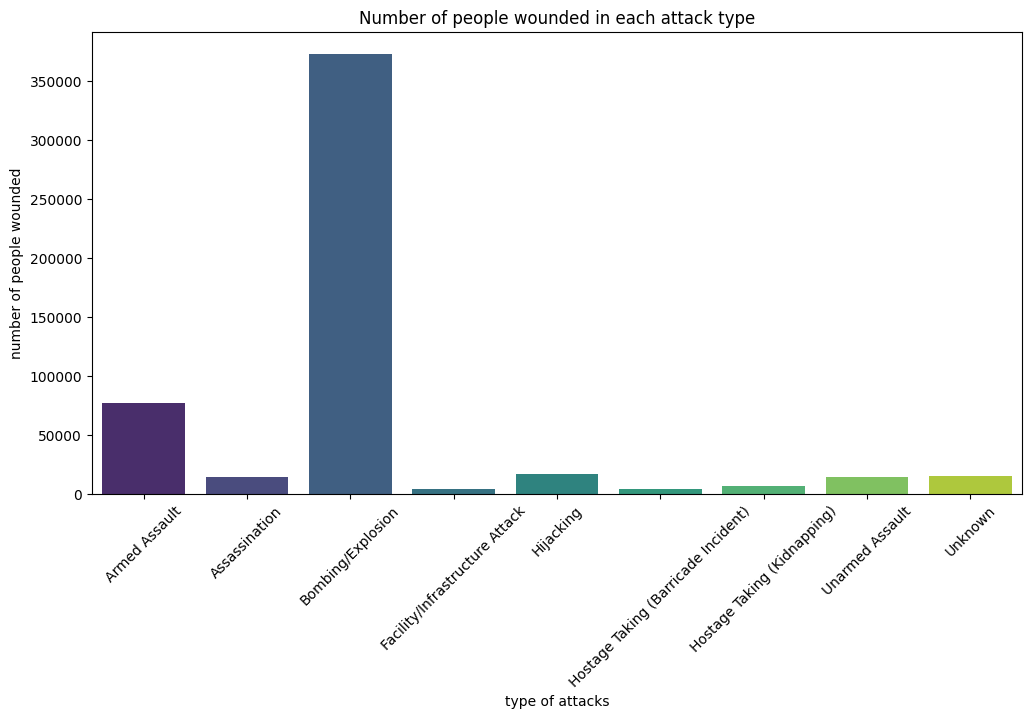

In [36]:
#people wounded in each attack type
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_wounded.index,y=attack_wounded.Wounded.values,palette="viridis")
plt.title('Number of people wounded in each attack type')
plt.xlabel('type of attacks')
plt.ylabel('number of people wounded')
plt.xticks(rotation=45)
plt.show()

# Conclusion

Country with the highest number of terrorist attacks:**Iraq**

Regions with the highest number of terrorist attacks: **Middle East& North Africa**

year with the most attacks:**2014**

Month with the most attacks:**5**

Group with the most attacks:**Taliban**

Most attack types:**Bombing/Explosion**